In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv("C:/Users/ali_s/Downloads/Assignment1_StreamFlow_Subscription_Data.csv")
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaN,NaN
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaN,NaN
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [9]:
# convert dates to correct format type
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'])

In [10]:
# dropping columns to only keep numeric data type columns, and perform descriptive analysis 
num_df = df.drop(columns=['User_ID', 'Content_ID', 'Gender', 'Location', 'Subscription_Type', 'Payment_Method', 'Subscription_Start_Date','Date_of_Churn','Favorite_Genre', 'Devices_Used', 'Reason_for_Churn'])
num_df.describe()

# Findings:
    # 24.6 % of total users churned 
    # Mean age = 44.38, lowest age = 18, highest = 70 
    # Avg monthly payment = 14.58, 
    # avg monthly hours watched = 19.07 hrs , mean > median - some high value outliers seem to be in the data, high variability in data (std value)
    # avg session length = 1.89 hrs,  mean > median - some high value outliers seem to be in the data, high variability in data (std value) 
    # Avg rating is 3

,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.385000,14.580000,19.071653,1.893771,3.030000,0.246000
std,15.321669,3.404922,19.279140,1.868852,1.422365,0.430894
min,18.000000,9.990000,0.041574,0.000486,1.000000,0.000000
25%,31.750000,9.990000,5.490739,0.548918,2.000000,0.000000
50%,45.000000,14.990000,13.361219,1.271808,3.000000,0.000000
75%,57.000000,14.990000,26.471636,2.623575,4.000000,0.000000
max,70.000000,19.990000,139.170408,11.417557,5.000000,1.000000


<Axes: >

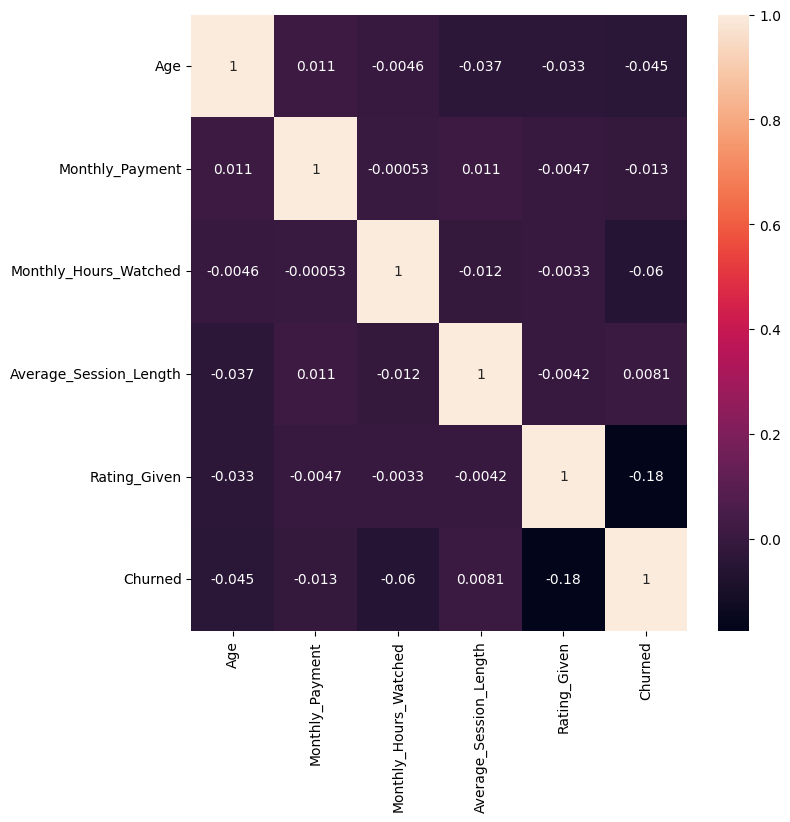

In [14]:
# making a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(num_df.corr(), annot=True)

# overall weak relationships are shown 
# strongest - ratings and churn, negative relationship, high rating will give low churn 
# monthly hours watched also shows some negative relationship, more engaged users will result in less churn 

In [ ]:
# group data by different conditions to see churn rate by different conditions 

# churn by location
df[df['Churned']==1].groupby('Location')['User_ID'].count() / df[df['Churned']==1]['User_ID'].count() * 100


Location
Central    19.105691
East       24.390244
North      21.544715
South      17.073171
West       17.886179
Name: User_ID, dtype: float64

In [ ]:
# churn by location and total userbase 
df[df['User_ID']>0].groupby(['Location','Churned'])['User_ID'].count() / df[df['User_ID']>0]['User_ID'].count() * 100


Location  Churned
Central   0          15.4
          1           4.7
East      0          14.0
          1           6.0
North     0          15.1
          1           5.3
South     0          13.7
          1           4.2
West      0          17.2
          1           4.4
Name: User_ID, dtype: float64

In [ ]:
# churn by location, reason
df[df['Churned']==1].groupby(['Location', 'Reason_for_Churn'])['User_ID'].count() / df[df['Churned']==1]['User_ID'].count() * 100

Location  Reason_for_Churn         
Central   Dissatisfied with content    4.065041
          Found better service         4.471545
          Personal reasons             6.097561
          Price increase               4.471545
East      Dissatisfied with content    4.878049
          Found better service         7.317073
          Personal reasons             4.878049
          Price increase               7.317073
North     Dissatisfied with content    2.845528
          Found better service         6.910569
          Personal reasons             6.504065
          Price increase               5.284553
South     Dissatisfied with content    3.658537
          Found better service         3.252033
          Personal reasons             4.878049
          Price increase               5.284553
West      Dissatisfied with content    5.691057
          Found better service         4.065041
          Personal reasons             2.845528
          Price increase               5.284553
Name

In [ ]:
# churn for Standard Subscription by location, reason
df[(df['Churned']==1) & (df['Subscription_Type']=='Standard')].groupby(['Location', 'Reason_for_Churn'])['User_ID'].count() / df[(df['Churned']==1) & (df['Subscription_Type']=='Standard')]['User_ID'].count() * 100

Location  Reason_for_Churn         
Central   Dissatisfied with content    2.419355
          Found better service         7.258065
          Personal reasons             6.451613
          Price increase               2.419355
East      Dissatisfied with content    8.064516
          Found better service         6.451613
          Personal reasons             4.838710
          Price increase               8.870968
North     Dissatisfied with content    0.806452
          Found better service         9.677419
          Personal reasons             7.258065
          Price increase               3.225806
South     Dissatisfied with content    1.612903
          Found better service         3.225806
          Personal reasons             4.032258
          Price increase               6.451613
West      Dissatisfied with content    5.645161
          Found better service         3.225806
          Personal reasons             0.806452
          Price increase               7.258065
Name

In [ ]:
# Findings
    # Highest churn rate is in East, followed by North 
    # None of the locations have abnormally high churn rates relative to their total user base, varies betweem 4-5% of total user base on average
    # Most common reason in East for churn was 'found better service' and 'price increase'
    # 'price increase' and 'found better service' also remained one of the the most significant reason in most locations


In [ ]:
# churn by Rating 
df[df['User_ID']>0].groupby(['Rating_Given','Churned'])['User_ID'].count() / df[df['User_ID']>0]['User_ID'].count() * 100


Rating_Given  Churned
1             0          13.3
              1           5.8
2             0          14.2
              1           7.0
3             0          12.7
              1           5.7
4             0          16.6
              1           3.6
5             0          18.6
              1           2.5
Name: User_ID, dtype: float64

In [ ]:
# churn by rating and reason 
df[df['Churned']==1].groupby(['Rating_Given','Reason_for_Churn'])['User_ID'].count() / df[df['Churned']==1]['User_ID'].count() * 100

#Findings
    # ratings and churn rate seem to have an inverse relationship, most satisfied customers (4,5 rating) did not seem to churn much
    # low rating customers (1,2 rating) churn most commonly due to price increase, personal reasons and finding better service 
        # this shows price sensitivity, and dissatisfaction with current offerings in this group 
    # high rating (4, 5 rating) less frequency of churn, reasons evenly distributed, price increase being least common one 
        # indicates good satisfaction levels and loyalty in this group 
    # avg rating (3 rating) churn % similar to low rating customers, price and competitive offerings (dissatisfied w/ content, better service) being most common factors 

Rating_Given  Reason_for_Churn         
1             Dissatisfied with content    3.658537
              Found better service         6.504065
              Personal reasons             6.910569
              Price increase               6.504065
2             Dissatisfied with content    6.097561
              Found better service         8.130081
              Personal reasons             4.878049
              Price increase               9.349593
3             Dissatisfied with content    4.878049
              Found better service         5.284553
              Personal reasons             6.504065
              Price increase               6.504065
4             Dissatisfied with content    4.065041
              Found better service         3.252033
              Personal reasons             3.658537
              Price increase               3.658537
5             Dissatisfied with content    2.439024
              Found better service         2.845528
              Personal r

In [ ]:
# churn by Subscription Type
df[df['User_ID']>0].groupby(['Subscription_Type','Churned'])['User_ID'].count() / df[df['User_ID']>0]['User_ID'].count() * 100

Subscription_Type  Churned
Basic              0          20.3
                   1           7.3
Premium            0          14.5
                   1           4.9
Standard           0          40.6
                   1          12.4
Name: User_ID, dtype: float64

In [ ]:
# not churn by Subscription Type, reason
df[df['Churned']==1].groupby(['Subscription_Type', 'Reason_for_Churn'])['User_ID'].count() / df[df['Churned']==1]['User_ID'].count() * 100

Subscription_Type  Reason_for_Churn         
Basic              Dissatisfied with content     8.536585
                   Found better service          6.504065
                   Personal reasons              8.536585
                   Price increase                6.097561
Premium            Dissatisfied with content     3.252033
                   Found better service          4.471545
                   Personal reasons              4.878049
                   Price increase                7.317073
Standard           Dissatisfied with content     9.349593
                   Found better service         15.040650
                   Personal reasons             11.788618
                   Price increase               14.227642
Name: User_ID, dtype: float64

In [ ]:
# Findings 
    # churn rates are evenly distributed among subcription types according to their total user base 
    # the %s for churn reasons in basic show users finding competitive offerings (content/service) & sensitivity to price
        # dissatisfied with content, want to pay less 
    # reasons for premium show some price sensitivity and competitive offerings as reasons
        # users might have found services with better content & overall platform at a better price 
    # for standard, reasons indicate that this segment is highly sensitive to price 
        # will switch if they dont find value for money - service, content offered, and price charged for that  

In [ ]:
# churn by device 
df[df['User_ID']>0].groupby(['Devices_Used','Churned'])['User_ID'].count() / df[df['User_ID']>0]['User_ID'].count() * 100

Devices_Used  Churned
Mobile        0          27.7
              1          13.1
PC            0          14.7
              1           2.7
TV            0          15.7
              1           4.4
Tablet        0          17.3
              1           4.4
Name: User_ID, dtype: float64

In [ ]:
# churn by device, reason
df[df['Churned']==1].groupby(['Devices_Used', 'Reason_for_Churn'])['User_ID'].count() / df[df['Churned']==1]['User_ID'].count() * 100

Devices_Used  Reason_for_Churn         
Mobile        Dissatisfied with content    12.601626
              Found better service         14.227642
              Personal reasons             13.414634
              Price increase               13.008130
PC            Dissatisfied with content     1.219512
              Found better service          2.032520
              Personal reasons              3.658537
              Price increase                4.065041
TV            Dissatisfied with content     4.065041
              Found better service          4.471545
              Personal reasons              5.691057
              Price increase                3.658537
Tablet        Dissatisfied with content     3.252033
              Found better service          5.284553
              Personal reasons              2.439024
              Price increase                6.910569
Name: User_ID, dtype: float64

In [ ]:
# Findings
    # highest level of churn coming from mobile users
        # highest user base is also using mobile phones, this is an alarming situation 
        # most common reason is 'found better service' for mobiles 
        # platform may not be well suited for mobile phones 
    # lowest churn from PC users (also lowest user base though)
        # price increase is most common reason, overall shows lesser tendency to switch to alternatives 

In [ ]:
# churn by reason 
df[df['Churned']==1].groupby(['Reason_for_Churn'])['User_ID'].count() / df[df['Churned']==1]['User_ID'].count() * 100

Reason_for_Churn
Dissatisfied with content    21.138211
Found better service         26.016260
Personal reasons             25.203252
Price increase               27.642276
Name: User_ID, dtype: float64

In [ ]:
# Findings
    # Club dissatisfied with content + found better service to define service quality 
        # together contributes to around 47% of churn factor, indicating dissatisfaction among users
            # content quality, better platform, user experience are potential areas for improvement
    # price indicates price sensitivity which is also signifcant
        # customers seem to be very price sensitive 
        # introduce competitve pricing, thorough market analysis 
        # discounts, loyalty programs, or value addition (new content/partnerships with big media groups, etc)
    # personal reasons can indicate external factors 
        # understand demographics of these 
        # offer customised/flexible plans or personalized communication to improve churn rates 

In [ ]:
# by genre
df[df['Churned']==1].groupby(['Favorite_Genre', 'Reason_for_Churn'])['User_ID'].count() / df[df['Churned']==1]['User_ID'].count() * 100

Favorite_Genre  Reason_for_Churn         
Action          Dissatisfied with content    4.878049
                Found better service         4.065041
                Personal reasons             4.878049
                Price increase               6.097561
Comedy          Dissatisfied with content    4.471545
                Found better service         6.097561
                Personal reasons             4.065041
                Price increase               5.284553
Documentary     Dissatisfied with content    2.032520
                Found better service         7.317073
                Personal reasons             5.284553
                Price increase               6.504065
Drama           Dissatisfied with content    4.471545
                Found better service         3.658537
                Personal reasons             5.691057
                Price increase               5.284553
Sci-Fi          Dissatisfied with content    5.284553
                Found better service    

In [ ]:
# Churn % of those dissatisfied with content by genre 
df[df['Reason_for_Churn']=='Dissatisfied with content'].groupby('Favorite_Genre')['User_ID'].count() / df[df['Reason_for_Churn']=='Dissatisfied with content']['User_ID'].count() * 100

Favorite_Genre
Action         23.076923
Comedy         21.153846
Documentary     9.615385
Drama          21.153846
Sci-Fi         25.000000
Name: User_ID, dtype: float64

In [ ]:
# Findings 
    # Sci-Fi and Action are genres with highest levels of content dissatisfaction
        # improve content quality, variety, update - top priority genre 
    # Second, Comedy & Drama, slightly lower but still significant dissatisfactin 
        # improve content quality, variety, update 

In [ ]:
# Feature Engineering

In [ ]:
# Creating a modified data frame using the original file only, with festure engineering columns, keeping df and df_mod seperate to avoid confusion
df_mod = pd.read_csv("C:/Users/ali_s/Downloads/Assignment1_StreamFlow_Subscription_Data.csv")

In [ ]:
# Calculating Subcription Length 

# convert dates to correct format type
df_mod['Subscription_Start_Date'] = pd.to_datetime(df_mod['Subscription_Start_Date'])
df_mod['Date_of_Churn'] = pd.to_datetime(df_mod['Date_of_Churn'])

df_mod['Subscription_Length'] = df_mod['Date_of_Churn'] - df_mod['Subscription_Start_Date']
df_mod


,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Length
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,NaT
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,NaT
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,NaT
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,NaT
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,139 days
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaT,NaN,NaT
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaT,NaN,NaT
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,143 days


In [ ]:
# we cant see the subscription length of customers who did not churn, since there is no date of churn for them 
# Assuming the churn date for existing customers as the latest churn date in the data frame, we will use this latest date to calculate subscription length of non churn customers 
df_mod['Date_of_Churn'].max()

Timestamp('2025-02-09 01:53:37.661719')

In [ ]:
df_mod['Date_of_Churn'] = df_mod['Date_of_Churn'].fillna('2025-02-09 01:53:37.661719')
df_mod['Date_of_Churn'] = pd.to_datetime(df_mod['Date_of_Churn'])
df_mod['Subscription_Length'] = df_mod['Date_of_Churn'] - df_mod['Subscription_Start_Date']
df_mod

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Length
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,2025-02-09 01:53:37.661719,NaN,1708 days 00:00:00.004785
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,2025-02-09 01:53:37.661719,NaN,354 days 00:00:00.004739
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,2025-02-09 01:53:37.661719,NaN,857 days 00:00:00.004724
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,2025-02-09 01:53:37.661719,NaN,1132 days 00:00:00.004713
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,2025-02-09 01:53:37.661719,NaN,1794 days 00:00:00.004702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,139 days 00:00:00
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,2025-02-09 01:53:37.661719,NaN,1739 days 23:59:59.993824
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,2025-02-09 01:53:37.661719,NaN,2061 days 23:59:59.993813
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,143 days 00:00:00


In [ ]:
# converting days to months because values are too high for analysis 
df_mod['Subscription_Length_Months'] = df_mod['Subscription_Length']/30.44
df_mod

# convert subscription length and subcription length months to float for further analysis
df_mod['Subscription_Length_Float_Days'] = df_mod['Subscription_Length'].dt.total_seconds() / 86400
df_mod['Subscription_Length_Float_Months'] = df_mod['Subscription_Length_Float_Days'] / 30.44
df_mod



,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,...,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Length,Subscription_Length_Months,Subscription_Length_Float_Days,Subscription_Length_Float_Months
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,...,1.195762,1023,5,0,2025-02-09 01:53:37.661719,NaN,1708 days 00:00:00.004785,56 days 02:38:56.925255749,1708.0,56.110381
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,...,0.809002,1076,1,0,2025-02-09 01:53:37.661719,NaN,354 days 00:00:00.004739,11 days 15:06:23.180181964,354.0,11.629435
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,...,1.153570,1095,2,0,2025-02-09 01:53:37.661719,NaN,857 days 00:00:00.004724,28 days 03:41:23.574399605,857.0,28.153745
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,...,0.609503,1003,1,0,2025-02-09 01:53:37.661719,NaN,1132 days 00:00:00.004713,37 days 04:30:35.479786892,1132.0,37.187911
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,...,0.359971,1012,4,0,2025-02-09 01:53:37.661719,NaN,1794 days 00:00:00.004702,58 days 22:27:16.793846978,1794.0,58.935611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,...,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,139 days 00:00:00,4 days 13:35:33.508541392,139.0,4.566360
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,...,3.222521,1069,4,0,2025-02-09 01:53:37.661719,NaN,1739 days 23:59:59.993824,57 days 03:52:44.782977135,1740.0,57.161629
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,...,1.221380,1079,1,0,2025-02-09 01:53:37.661719,NaN,2061 days 23:59:59.993813,67 days 17:45:20.104921583,2062.0,67.739816
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,...,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,143 days 00:00:00,4 days 16:44:46.990801576,143.0,4.697766


<Axes: xlabel='None', ylabel='Subscription_Length_Float_Months'>

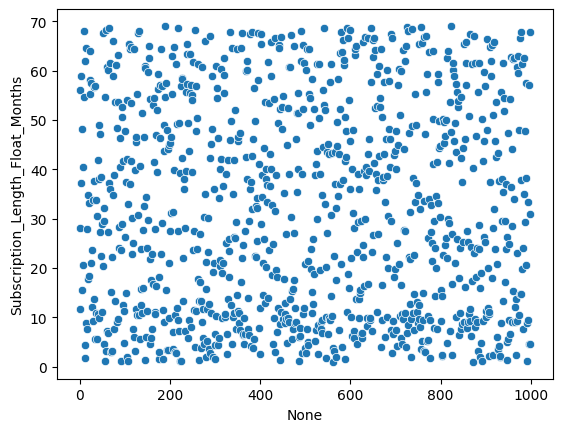

In [ ]:
# the following exploration on subscription length months is to identify if there are any loyalty patterns 

sns.scatterplot(x=df_mod.index, y=df_mod['Subscription_Length_Float_Months'])
# no significant outliers or trend identified 


<Axes: ylabel='Subscription_Length_Float_Months'>

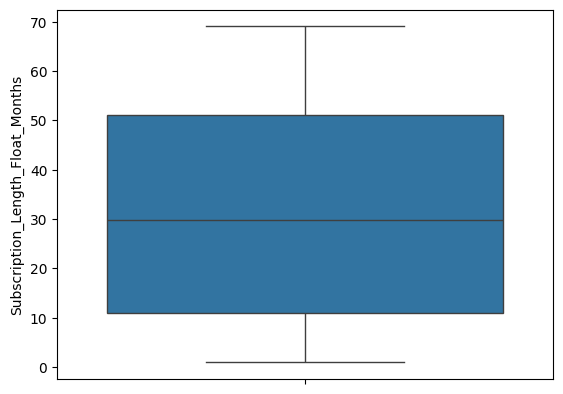

In [ ]:
sns.boxplot(y=df_mod['Subscription_Length_Float_Months'])
# no outliers


In [ ]:
df_mod['Subscription_Length_Float_Months'].describe()

count    1000.000000
mean       32.015834
std        21.265288
min         0.985545
25%        10.923127
50%        29.878449
75%        51.116951
max        69.053876
Name: Subscription_Length_Float_Months, dtype: float64

In [ ]:
# seperate churn and non churn data and do analyse further

df_mod_churn = df_mod[df_mod['Churned']==1]
df_mod_not_churn = df_mod[df_mod['Churned']==0]


In [ ]:
df_mod_churn['Subscription_Length_Float_Months'].describe()

count    246.000000
mean       6.417796
std        3.136785
min        0.985545
25%        3.777924
50%        6.603154
75%        9.091656
max       11.957950
Name: Subscription_Length_Float_Months, dtype: float64

<Axes: ylabel='Monthly_Hours_Watched'>

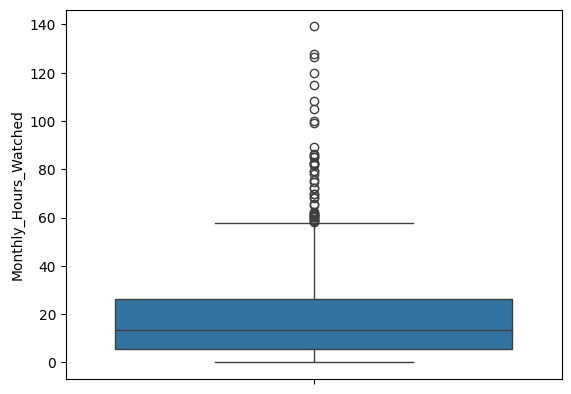

In [ ]:
sns.boxplot(y='Monthly_Hours_Watched', data=df)

# boxplot shows data is distrbuted over a wide range, with significant no of outliers 

In [ ]:
# making quartiles of subscription length and monthly hours watched

df_mod['Monthly_Hours_Watched_Qt'] = pd.qcut(df_mod['Monthly_Hours_Watched'], 4, labels = ['Q1','Q2','Q3','Q4'])
df_mod['Subscription_Length_Float_Months_Qt'] = pd.qcut(df_mod['Subscription_Length_Float_Months'], 4, labels = ['Q1','Q2','Q3','Q4'])

df_mod

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,...,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Length,Subscription_Length_Months,Subscription_Length_Float_Days,Subscription_Length_Float_Months,Monthly_Hours_Watched_Qt,Subscription_Length_Float_Months_Qt
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,...,5,0,2025-02-09 01:53:37.661719,NaN,1708 days 00:00:00.004785,56 days 02:38:56.925255749,1708.0,56.110381,Q4,Q4
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,...,1,0,2025-02-09 01:53:37.661719,NaN,354 days 00:00:00.004739,11 days 15:06:23.180181964,354.0,11.629435,Q1,Q2
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,...,2,0,2025-02-09 01:53:37.661719,NaN,857 days 00:00:00.004724,28 days 03:41:23.574399605,857.0,28.153745,Q1,Q2
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,...,1,0,2025-02-09 01:53:37.661719,NaN,1132 days 00:00:00.004713,37 days 04:30:35.479786892,1132.0,37.187911,Q4,Q3
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,...,4,0,2025-02-09 01:53:37.661719,NaN,1794 days 00:00:00.004702,58 days 22:27:16.793846978,1794.0,58.935611,Q1,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,...,1,1,2021-03-14 01:53:37.667884,Found better service,139 days 00:00:00,4 days 13:35:33.508541392,139.0,4.566360,Q1,Q1
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,...,4,0,2025-02-09 01:53:37.661719,NaN,1739 days 23:59:59.993824,57 days 03:52:44.782977135,1740.0,57.161629,Q3,Q4
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,...,1,0,2025-02-09 01:53:37.661719,NaN,2061 days 23:59:59.993813,67 days 17:45:20.104921583,2062.0,67.739816,Q4,Q4
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,...,2,1,2021-04-05 01:53:37.667917,Found better service,143 days 00:00:00,4 days 16:44:46.990801576,143.0,4.697766,Q2,Q1


<Axes: xlabel='Monthly_Hours_Watched', ylabel='Subscription_Length_Float_Months'>

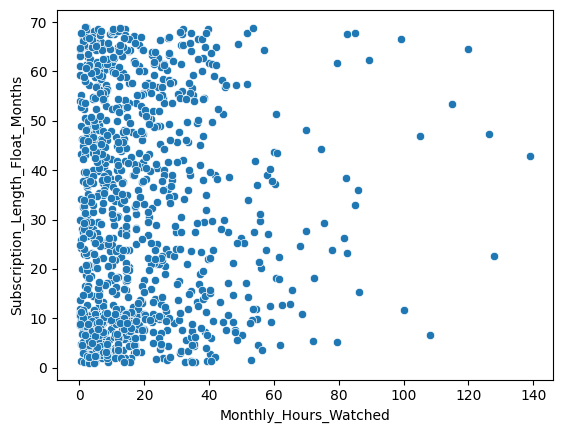

In [ ]:
sns.scatterplot(x='Monthly_Hours_Watched', y='Subscription_Length_Float_Months', data=df_mod)

# no relationship identified between monthly hours watched and subscription length 

In [ ]:
# Defining Customer Types 

# Top fans:        
    # subscription length (Q4,Q3)
    # monthly hrs (Q4, Q3)
# Loyal users: 
    # subscription length (Q4, Q3)
    # monthly hrs (Q1, Q2)
# Avid Users: 
    # subscription length (Q1,Q2)
    # monthly hrs (Q3,Q4) 
# Casual users: 
    # subscription length (Q1,Q2)
    # monthly hrs (Q1, Q2) 

def customer_type(row):
    # Top fans: 
    if row['Subscription_Length_Float_Months_Qt'] == ['Q4','Q3'] and row['Monthly_Hours_Watched_Qt'] == ['Q4,Q3']:
        return "Top Fans"
    elif row['Subscription_Length_Float_Months_Qt'] == ['Q4','Q3'] and row['Monthly_Hours_Watched_Qt'] == ['Q1,Q2']:
        return "Loyal Users"
    elif row['Subscription_Length_Float_Months_Qt'] == ['Q1','Q2'] and row['Monthly_Hours_Watched_Qt'] == ['Q3,Q4']:
        return "Avid Users"
    elif row['Subscription_Length_Float_Months_Qt'] == ['Q1','Q2'] and row['Monthly_Hours_Watched_Qt'] == ['Q1,Q2']:
        return "Casual Users"
    else:
        return "Not Defined User"
    

df_mod['Customer Type'] = df_mod.apply(customer_type, axis=1)


In [ ]:
df_mod[df_mod['Churned']==1].groupby('Customer Type')['User_ID'].count() / df_mod[df_mod['Churned']==1]['User_ID'].count() * 100

# none of the customers are falling under the definition created 

Customer Type
Not Defined User    100.0
Name: User_ID, dtype: float64

In [ ]:
# Make new definition, with less conditions

    # Loyalty levels: 
        # High loyalty: subscription length = Q3, Q4 
        # Moderate loyalty: subscription length = Q2
        # Low loyalty: subscription length = Q1
    # Engagement levels: 
        # High engagement: monthly hours = Q3, Q4
        # Moderate engagement: monthly hours = Q2
        # Low engagement: subscription length = Q1
    # Satisfaction levels: 
        # High satisfaction: rating = 4, 5
        # Moderate satisfaction: rating = 3
        # Low satisfaction: rating = 1, 2

    # then define all possible CUSTOMER TYPES using the above three parameters: 
        # High Engagement, High Satisfaction, High Loyalty - Super Stars - Actively using the service, extremely happy with it, and very likely to continue using it.
        # High Engagement, High Satisfaction, Moderate Loyalty - Potential Stars - Actively using the service, extremely happy with it, but somewhat likely to switch or leave.
        # High Engagement, High Satisfaction, Low Loyalty - Engaged but Uncertain - Actively using the service, extremely happy with it, but not likely to stick around.
        # High Engagement, Moderate Satisfaction, High Loyalty - Committed Achievers - Actively using the service, somewhat happy with it, and very likely to continue using it.
        # High Engagement, Moderate Satisfaction, Moderate Loyalty - Active Potentials - Actively using the service, somewhat happy with it, but somewhat likely to switch or leave
        # High Engagement, Moderate Satisfaction, Low Loyalty - Engaged but Critical - Actively using the service, somewhat happy with it, but not likely to stick around.
        # High Engagement, Low Satisfaction, High Loyalty - Loyal but Discontented - Actively using the service, not happy with it, but very likely to continue using it.
        # High Engagement, Low Satisfaction, Moderate Loyalty - Engaged but Frustrated - Actively using the service, not happy with it, and somewhat likely to switch or leave.
        # High Engagement, Low Satisfaction, Low Loyalty - At-Risk Engaged  - Actively using the service, not happy with it, and not likely to stick around.
        # Moderate Engagement, High Satisfaction, High Loyalty - Steady Stars - Occasionally using the service, extremely happy with it, and very likely to continue using it. 
        # Moderate Engagement, High Satisfaction, Moderate Loyalty - Satisfied Potentials - Occasionally using the service, extremely happy with it, but somewhat likely to switch or leave.
        # Moderate Engagement, High Satisfaction, Low Loyalty - Content but Uncertain - Occasionally using the service, extremely happy with it, but not likely to stick around.
        # Moderate Engagement, Moderate Satisfaction, High Loyalty - Steady Committers - Occasionally using the service, somewhat happy with it, and very likely to continue using it. 
        # Moderate Engagement, Moderate Satisfaction, Moderate Loyalty - Balanced Potentials - Occasionally using the service, somewhat happy with it, but somewhat likely to switch or leave. 
        # Moderate Engagement, Moderate Satisfaction, Low Loyalty - Inconsistent Potentials - Occasionally using the service, somewhat happy with it, but not likely to stick around. 
        # Moderate Engagement, Low Satisfaction, High Loyalty - Loyal but Disengaged - Occasionally using the service, not happy with it, but very likely to continue using it. 
        # Moderate Engagement, Low Satisfaction, Moderate Loyalty - Moderate but Frustrated - Occasionally using the service, not happy with it, and somewhat likely to switch or leave.
        # Moderate Engagement, Low Satisfaction, Low Loyalty - At-Risk Potentials - Occasionally using the service, not happy with it, and not likely to stick around.
        # Low Engagement, High Satisfaction, High Loyalty - Silent Stars - Rarely using the service, extremely happy with it, and very likely to continue using it.
        # Low Engagement, High Satisfaction, Moderate Loyalty - Satisfied but Inactive - Rarely using the service, extremely happy with it, but somewhat likely to switch or leave.
        # Low Engagement, High Satisfaction, Low Loyalty - Content but Disengaged - Rarely using the service, extremely happy with it, but not likely to stick around. 
        # Low Engagement, Moderate Satisfaction, High Loyalty - Loyal but Passive - Rarely using the service, somewhat happy with it, and very likely to continue using it.
        # Low Engagement, Moderate Satisfaction, Moderate Loyalty - Passive Potentials - Rarely using the service, somewhat happy with it, but somewhat likely to switch or leave.
        # Low Engagement, Moderate Satisfaction, Low Loyalty - Uncertain but Passive - Rarely using the service, somewhat happy with it, but not likely to stick around.
        # Low Engagement, Low Satisfaction, High Loyalty - Loyal but Unhappy - Rarely using the service, not happy with it, but very likely to continue using it.
        # Low Engagement, Low Satisfaction, Moderate Loyalty - Disengaged and Critical - Rarely using the service, not happy with it, and somewhat likely to switch or leave.
        # Low Engagement, Low Satisfaction, Low Loyalty - Critical and Disengaged - Rarely using the service, not happy with it, and not likely to stick around.

# function for loyalty levels 
def loyalty_level(row):
    if row['Subscription_Length_Float_Months_Qt'] in ['Q4','Q3']: 
        return "High"
    elif row['Subscription_Length_Float_Months_Qt'] in ['Q2']:
        return "Moderate"
    elif row['Subscription_Length_Float_Months_Qt'] in ['Q1']:
        return "Low"    
    else:
        return "Not Defined User"

df_mod['Loyalty_Level'] = df_mod.apply(loyalty_level, axis=1)

# function for engagement levels
def engagement_level(row):
    if row['Monthly_Hours_Watched_Qt'] in ['Q4','Q3']: 
        return "High"
    elif row['Monthly_Hours_Watched_Qt'] in ['Q2']:
        return "Moderate"
    elif row['Monthly_Hours_Watched_Qt'] in ['Q1']:
        return "Low"    
    else:
        return "Not Defined User"

df_mod['Engagement_Level'] = df_mod.apply(engagement_level, axis=1)

# function for satisfaction levels 
def satisfaction_level(row):
    if row['Rating_Given'] in [4,5]: 
        return "High"
    elif row['Rating_Given'] in [3]:
        return "Moderate"
    elif row['Rating_Given'] in [1,2]:
        return "Low"    
    else:
        return "Not Defined"

df_mod['Satisfaction_Level'] = df_mod.apply(satisfaction_level, axis=1)

# function for user category 

# dictionary of conditions: 
conditions_dict = {('High', 'High', 'High'):'Super Stars', ('High', 'High', 'Moderate'):'Potential Stars', ('High', 'High', 'Low'):'Engaged but Uncertain', ('High', 'Moderate', 'High'):'Committed Achievers', ('High', 'Moderate', 'Moderate'):'Active Potentials', ('High', 'Moderate', 'Low'):'Engaged but Critical', ('High', 'Low', 'High'):'Loyal but Discontented', ('High', 'Low', 'Moderate'):'Engaged but Frustrated', ('High', 'Low', 'Low'):'At-Risk Engaged', ('Moderate' , 'High' , 'High'):'Steady Stars', ('Moderate' , 'High' , 'Moderate'):'Satisfied Stars', ('Moderate' , 'High' , 'Low'): 'Content but Uncertain', ('Moderate' , 'Moderate' , 'High'):'Steady Committers', ('Moderate' , 'Moderate' , 'Moderate'):'Balanced Potentials', ('Moderate' , 'Moderate' , 'Low'):'Inconsistent Potentials',('Moderate' , 'Low' , 'High'):'Loyal but Disengaged',('Moderate' , 'Low' , 'Moderate'):'Moderate but Frustrated',('Moderate' , 'Low' , 'Low'): 'At Risk Potentials', ('Low' , 'High' , 'High'): 'Silent Stars', ('Low' , 'High' , 'Moderate'): 'Satisfied but Inactive', ('Low' , 'High' , 'Low'): 'Content but Disengaged', ('Low' , 'Moderate' , 'High'): 'Loyal but Passive', ('Low' , 'Moderate' , 'Moderate'): 'Passive Potentials', ('Low' , 'Moderate' , 'Low'): 'Uncertain but Passive', ('Low' , 'Low' , 'High'): 'Loyal but Unhappy', ('Low' , 'Low' , 'Moderate'): 'Disengaged and Critical', ('Low', 'Low', 'Low'): 'Critical and Disengaged'}

# function code
def customer_type(row, conditions_dict):
    key = (row['Engagement_Level'], row['Satisfaction_Level'], row['Loyalty_Level'])
    return conditions_dict.get(key, 'Not Defined')

df_mod['Customer_Type'] = df_mod.apply(lambda row: customer_type(row, conditions_dict), axis=1)

df_mod



,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,...,Subscription_Length_Months,Subscription_Length_Float_Days,Subscription_Length_Float_Months,Monthly_Hours_Watched_Qt,Subscription_Length_Float_Months_Qt,Customer Type,Loyalty_Level,Engagement_Level,Satisfaction_Level,Customer_Type
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,...,56 days 02:38:56.925255749,1708.0,56.110381,Q4,Q4,Not Defined User,High,High,High,Super Stars
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,...,11 days 15:06:23.180181964,354.0,11.629435,Q1,Q2,Not Defined User,Moderate,Low,Low,Disengaged and Critical
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,...,28 days 03:41:23.574399605,857.0,28.153745,Q1,Q2,Not Defined User,Moderate,Low,Low,Disengaged and Critical
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,...,37 days 04:30:35.479786892,1132.0,37.187911,Q4,Q3,Not Defined User,High,High,Low,Loyal but Discontented
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,...,58 days 22:27:16.793846978,1794.0,58.935611,Q1,Q4,Not Defined User,High,Low,High,Silent Stars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,...,4 days 13:35:33.508541392,139.0,4.566360,Q1,Q1,Not Defined User,Low,Low,Low,Critical and Disengaged
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,...,57 days 03:52:44.782977135,1740.0,57.161629,Q3,Q4,Not Defined User,High,High,High,Super Stars
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,...,67 days 17:45:20.104921583,2062.0,67.739816,Q4,Q4,Not Defined User,High,High,Low,Loyal but Discontented
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,...,4 days 16:44:46.990801576,143.0,4.697766,Q2,Q1,Not Defined User,Low,Moderate,Low,At Risk Potentials


In [ ]:
# Now check churn level according to customer engagement levels, loyalty and satiafaction levels 

In [ ]:
# churn by loyalty levels

df_mod[df_mod['User_ID'] > 0].groupby(['Loyalty_Level', 'Churned'])['User_ID'].count() / df_mod[df_mod['User_ID'] > 0]['User_ID'].count() * 100

# Findings: 
    # 50% of total customers have high loyalty and did not churn 
        # 66.3% of total not churned customers have hig loyalty 
        # maintain these users
    # 26% of total customers have low loyalty of which 22.5% churned 
        # 91.5% of total churned users have low loyalty
        # implement strategies to improve their loyalty 
    # 24% of total users have moderate loyalty, of which 2.1% churned
        # 8.5% of total churned users have moderate loyalty 
        # balanced results, but room to improve their loyalty
        # implement strategies to convert in high loyalty customers

Loyalty_Level  Churned
High           0          50.0
Low            0           2.5
               1          22.5
Moderate       0          22.9
               1           2.1
Name: User_ID, dtype: float64

In [ ]:
df_mod[df_mod['Churned'] == 1].groupby(['Loyalty_Level'])['User_ID'].count() / df_mod[df_mod['Churned'] == 1]['User_ID'].count() * 100

Loyalty_Level
Low         91.463415
Moderate     8.536585
Name: User_ID, dtype: float64

In [ ]:
df_mod[df_mod['Churned'] == 0].groupby(['Loyalty_Level'])['User_ID'].count() / df_mod[df_mod['Churned'] == 0]['User_ID'].count() * 100

Loyalty_Level
High        66.312997
Low          3.315650
Moderate    30.371353
Name: User_ID, dtype: float64

<Axes: ylabel='Loyalty_Level'>

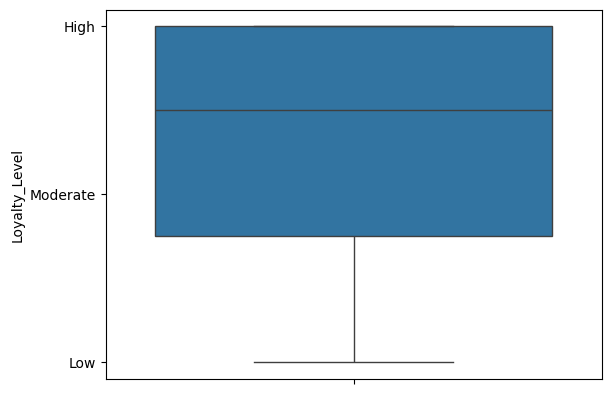

In [ ]:
sns.boxplot(data=df_mod, y='Loyalty_Level')


In [ ]:
# churn by engagement levels
df_mod[df_mod['User_ID'] > 0].groupby(['Engagement_Level', 'Churned'])['User_ID'].count() / df_mod[df_mod['User_ID'] > 0]['User_ID'].count() * 100

# Findings: 
    # high engagement users have low churn rate 
    # moderate engagement also has decent retention, try to improve and engage more to further reduce churn 
    # low engagement needs attention, highest churn rate 

Engagement_Level  Churned
High              0          38.8
                  1          11.2
Low               0          18.4
                  1           6.6
Moderate          0          18.2
                  1           6.8
Name: User_ID, dtype: float64

In [ ]:
# churn by satisfaction levels
df_mod[df_mod['User_ID'] > 0].groupby(['Satisfaction_Level', 'Churned'])['User_ID'].count() / df_mod[df_mod['Churned'] == 0]['User_ID'].count() * 100

Satisfaction_Level  Churned
High                0          46.684350
                    1           8.090186
Low                 0          36.472149
                    1          16.976127
Moderate            0          16.843501
                    1           7.559682
Name: User_ID, dtype: float64

In [ ]:
# churn by loyalty levels
df_mod[df_mod['User_ID'] > 0].groupby(['Loyalty_Level', 'Churned'])['User_ID'].count() / df_mod[df_mod['Churned'] == 0]['User_ID'].count() * 100

Loyalty_Level  Churned
High           0          66.312997
Low            0           3.315650
               1          29.840849
Moderate       0          30.371353
               1           2.785146
Name: User_ID, dtype: float64

<Axes: xlabel='Engagement_Level', ylabel='Churned'>

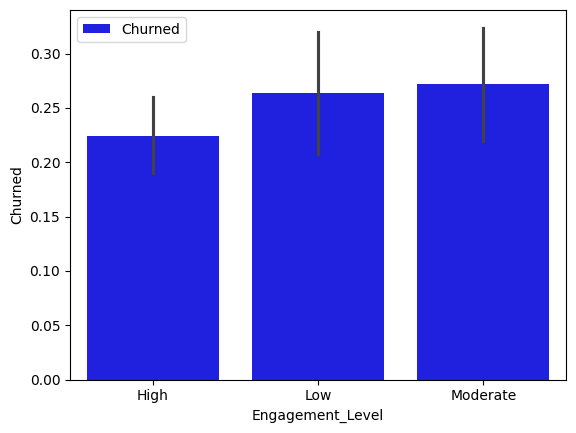

In [ ]:
sns.barplot(x='Engagement_Level', y='Churned', data=df_mod, color='blue', label='Churned')


In [ ]:
# group by customer type, churn 
df_mod[df_mod['Churned'] == 1].groupby(['Customer_Type'])['User_ID'].count() / df_mod[df_mod['User_ID'] > 0]['User_ID'].count() * 100

# develop targeted strategies for each customer type 


Customer_Type
Active Potentials          0.2
At Risk Potentials         3.8
At-Risk Engaged            4.7
Content but Disengaged     1.0
Content but Uncertain      1.3
Critical and Disengaged    3.1
Disengaged and Critical    0.6
Engaged but Critical       2.2
Engaged but Frustrated     0.6
Engaged but Uncertain      3.4
Inconsistent Potentials    1.5
Passive Potentials         0.3
Potential Stars            0.1
Satisfied Stars            0.2
Satisfied but Inactive     0.1
Uncertain but Passive      1.5
Name: User_ID, dtype: float64

In [ ]:
# group by customer type, non churn 
df_mod[df_mod['Churned'] == 0].groupby(['Customer_Type'])['User_ID'].count() / df_mod[df_mod['User_ID'] > 0]['User_ID'].count() * 100


Customer_Type
Active Potentials           2.5
At Risk Potentials          0.1
At-Risk Engaged             0.6
Balanced Potentials         0.3
Committed Achievers         3.4
Content but Disengaged      0.3
Content but Uncertain       0.1
Critical and Disengaged     0.3
Disengaged and Critical     1.5
Engaged but Critical        0.3
Engaged but Frustrated      4.8
Engaged but Uncertain       0.5
Inconsistent Potentials     0.2
Loyal but Discontented      8.9
Loyal but Disengaged        4.7
Loyal but Passive           2.5
Loyal but Unhappy           4.6
Moderate but Frustrated     2.0
Passive Potentials          1.3
Potential Stars             5.5
Satisfied Stars             2.4
Satisfied but Inactive      2.6
Silent Stars                5.2
Steady Committers           2.1
Steady Stars                6.3
Super Stars                12.3
Uncertain but Passive       0.1
Name: User_ID, dtype: float64

In [ ]:
# Customer types existing in the Churned group of Standard Subscription Type
df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1)].groupby(['Customer_Type'])['User_ID'].count() / df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1)]['User_ID'].count() * 100

# tells which groups to target the most in the 'Standard' subs type, helps identify pain points of Standard package according to customer type 


Customer_Type
At Risk Potentials         13.709677
At-Risk Engaged            20.161290
Content but Disengaged      6.451613
Content but Uncertain       4.838710
Critical and Disengaged    11.290323
Disengaged and Critical     3.225806
Engaged but Critical        9.677419
Engaged but Frustrated      4.032258
Engaged but Uncertain      15.322581
Inconsistent Potentials     8.064516
Satisfied Stars             0.806452
Uncertain but Passive       2.419355
Name: User_ID, dtype: float64

In [ ]:
# Customer types existing in the non Churned group of Standard Subscription Type
df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==0)].groupby(['Customer_Type'])['User_ID'].count() / df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==0)]['User_ID'].count() * 100

# tells if there are any 'warning alerts' in the non churn 

Customer_Type
Active Potentials           3.448276
At Risk Potentials          0.246305
At-Risk Engaged             0.738916
Balanced Potentials         0.492611
Committed Achievers         3.940887
Content but Disengaged      0.246305
Content but Uncertain       0.246305
Critical and Disengaged     0.246305
Disengaged and Critical     2.463054
Engaged but Critical        0.492611
Engaged but Frustrated      5.665025
Engaged but Uncertain       0.738916
Loyal but Discontented     11.576355
Loyal but Disengaged        6.157635
Loyal but Passive           2.955665
Loyal but Unhappy           6.650246
Moderate but Frustrated     2.955665
Passive Potentials          1.231527
Potential Stars             8.866995
Satisfied Stars             2.463054
Satisfied but Inactive      2.955665
Silent Stars                6.896552
Steady Committers           1.970443
Steady Stars                8.866995
Super Stars                17.241379
Uncertain but Passive       0.246305
Name: User_ID, dtype: fl

In [ ]:
# age group categorization 

def age_group(row):
    age = row['Age']
    if 18 <= age <=25: 
        return '18-25'
    elif 26 <= age <= 35: 
        return '26-35'
    elif 36 <= age <= 45: 
        return '36-45'
    elif 46 <= age <= 55:
        return '46-55'
    elif 56 <= age <= 65:
        return '56-65'
    elif 66 <= age <= 75:
        return '66-75'
    else:
        return 'Not Defined'

df_mod['Age_Group'] = df_mod.apply(age_group, axis=1)

df_mod

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,...,Subscription_Length_Float_Days,Subscription_Length_Float_Months,Monthly_Hours_Watched_Qt,Subscription_Length_Float_Months_Qt,Customer Type,Loyalty_Level,Engagement_Level,Satisfaction_Level,Customer_Type,Age_Group
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,...,1708.0,56.110381,Q4,Q4,Not Defined User,High,High,High,Super Stars,56-65
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,...,354.0,11.629435,Q1,Q2,Not Defined User,Moderate,Low,Low,Disengaged and Critical,66-75
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,...,857.0,28.153745,Q1,Q2,Not Defined User,Moderate,Low,Low,Disengaged and Critical,46-55
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,...,1132.0,37.187911,Q4,Q3,Not Defined User,High,High,Low,Loyal but Discontented,26-35
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,...,1794.0,58.935611,Q1,Q4,Not Defined User,High,Low,High,Silent Stars,56-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,...,139.0,4.566360,Q1,Q1,Not Defined User,Low,Low,Low,Critical and Disengaged,18-25
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,...,1740.0,57.161629,Q3,Q4,Not Defined User,High,High,High,Super Stars,66-75
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,...,2062.0,67.739816,Q4,Q4,Not Defined User,High,High,Low,Loyal but Discontented,46-55
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,...,143.0,4.697766,Q2,Q1,Not Defined User,Low,Moderate,Low,At Risk Potentials,66-75


In [ ]:
# customer type demographic analysis 
# Customer types according to age and location in Standard tier
df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1)].groupby(['Age_Group', 'Location'])['User_ID'].count() / df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1)]['User_ID'].count() * 100

# highest churn rate in 56 - 65 age group, followed by 26-35 age group 

Age_Group  Location
18-25      Central     2.419355
           East        2.419355
           North       4.032258
           South       3.225806
           West        4.838710
26-35      Central     6.451613
           East        5.645161
           North       0.806452
           South       3.225806
           West        3.225806
36-45      Central     0.806452
           East        4.838710
           North       4.838710
           South       3.225806
           West        3.225806
46-55      Central     4.032258
           East        4.838710
           North       2.419355
           South       1.612903
           West        3.225806
56-65      Central     3.225806
           East        6.451613
           North       6.451613
           South       1.612903
           West        2.419355
66-75      Central     1.612903
           East        4.032258
           North       2.419355
           South       2.419355
Name: User_ID, dtype: float64

In [ ]:
df_mod[(df_mod['Churned']==1)].groupby(['Age_Group', 'Location'])['User_ID'].count() / df_mod[(df_mod['Churned']==1)]['User_ID'].count() * 100
# churn by age group and location (across all packages)

Age_Group  Location
18-25      Central     3.252033
           East        2.032520
           North       3.658537
           South       2.439024
           West        3.658537
26-35      Central     5.284553
           East        5.691057
           North       2.032520
           South       3.252033
           West        2.845528
36-45      Central     2.032520
           East        6.910569
           North       5.691057
           South       5.284553
           West        4.471545
46-55      Central     3.658537
           East        3.252033
           North       2.845528
           South       2.845528
           West        2.845528
56-65      Central     3.252033
           East        3.252033
           North       4.471545
           South       1.626016
           West        2.845528
66-75      Central     1.626016
           East        3.252033
           North       2.845528
           South       1.626016
           West        1.219512
Name: User_ID, dtype

In [ ]:
# Customer types according to age in Standard tier
df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1) & (df_mod['Age_Group']=='18-25')].groupby(['Customer_Type', 'Location'])['User_ID'].count() / df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1)]['User_ID'].count() * 100

# churn rates of each customer types in 18-25 age group of Standard tier 

Customer_Type            Location
At Risk Potentials       North       0.806452
                         South       0.806452
                         West        0.806452
At-Risk Engaged          East        0.806452
                         North       1.612903
Content but Disengaged   Central     0.806452
                         West        0.806452
Critical and Disengaged  Central     0.806452
                         East        0.806452
                         West        0.806452
Disengaged and Critical  East        0.806452
Engaged but Critical     South       0.806452
                         West        0.806452
Engaged but Uncertain    North       0.806452
                         South       0.806452
Inconsistent Potentials  Central     0.806452
                         North       0.806452
                         West        1.612903
Uncertain but Passive    South       0.806452
Name: User_ID, dtype: float64

In [ ]:
df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1) & (df_mod['Age_Group']=='26-35')].groupby(['Customer_Type'])['User_ID'].count() / df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1)]['User_ID'].count() * 100

# churn rates of each customer types in 26-35 age group of Standard tier 

Customer_Type
At Risk Potentials         3.225806
At-Risk Engaged            3.225806
Content but Disengaged     1.612903
Content but Uncertain      0.806452
Critical and Disengaged    1.612903
Disengaged and Critical    0.806452
Engaged but Critical       2.419355
Engaged but Frustrated     1.612903
Engaged but Uncertain      3.225806
Satisfied Stars            0.806452
Name: User_ID, dtype: float64

In [ ]:
df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1) & (df_mod['Age_Group']=='36-45')].groupby(['Customer_Type'])['User_ID'].count() / df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1)]['User_ID'].count() * 100

# churn rates of each customer types in 36-45 age group of Standard tier 

Customer_Type
At Risk Potentials         1.612903
At-Risk Engaged            2.419355
Content but Disengaged     0.806452
Content but Uncertain      1.612903
Critical and Disengaged    1.612903
Engaged but Critical       0.806452
Engaged but Frustrated     0.806452
Engaged but Uncertain      5.645161
Uncertain but Passive      1.612903
Name: User_ID, dtype: float64

In [ ]:
df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1) & (df_mod['Age_Group']=='46-55')].groupby(['Customer_Type'])['User_ID'].count() / df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1)]['User_ID'].count() * 100

# churn rates of each customer types in 46-55 age group of Standard tier 

Customer_Type
At Risk Potentials         2.419355
At-Risk Engaged            4.838710
Content but Disengaged     0.806452
Content but Uncertain      1.612903
Critical and Disengaged    1.612903
Disengaged and Critical    1.612903
Engaged but Critical       0.806452
Engaged but Frustrated     0.806452
Engaged but Uncertain      1.612903
Name: User_ID, dtype: float64

In [ ]:
df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1) & (df_mod['Age_Group']=='56-65')].groupby(['Customer_Type'])['User_ID'].count() / df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1)]['User_ID'].count() * 100

# churn rates of each customer types in 56-65 age group of Standard tier 

Customer_Type
At Risk Potentials         2.419355
At-Risk Engaged            4.838710
Content but Disengaged     0.806452
Content but Uncertain      0.806452
Critical and Disengaged    2.419355
Engaged but Critical       2.419355
Engaged but Uncertain      1.612903
Inconsistent Potentials    4.838710
Name: User_ID, dtype: float64

In [ ]:
df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1) & (df_mod['Age_Group']=='66-75')].groupby(['Customer_Type'])['User_ID'].count() / df_mod[(df_mod['Subscription_Type']=='Standard') & (df_mod['Churned']==1)]['User_ID'].count() * 100

# churn rates of each customer types in 65-75 age group of Standard tier 

Customer_Type
At Risk Potentials         1.612903
At-Risk Engaged            2.419355
Content but Disengaged     0.806452
Critical and Disengaged    1.612903
Engaged but Critical       1.612903
Engaged but Frustrated     0.806452
Engaged but Uncertain      1.612903
Name: User_ID, dtype: float64

In [ ]:
# Calculating Customer Lifetime Value for each user 

df_mod['CLV'] = df_mod['Monthly_Payment'] * df_mod['Subscription_Length_Float_Months']
df_mod

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,...,Subscription_Length_Float_Months,Monthly_Hours_Watched_Qt,Subscription_Length_Float_Months_Qt,Customer Type,Loyalty_Level,Engagement_Level,Satisfaction_Level,Customer_Type,Age_Group,CLV
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,...,56.110381,Q4,Q4,Not Defined User,High,High,High,Super Stars,56-65,1121.646518
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,...,11.629435,Q1,Q2,Not Defined User,Moderate,Low,Low,Disengaged and Critical,66-75,174.325230
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,...,28.153745,Q1,Q2,Not Defined User,Moderate,Low,Low,Disengaged and Critical,46-55,422.024639
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,...,37.187911,Q4,Q3,Not Defined User,High,High,Low,Loyal but Discontented,26-35,557.446781
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,...,58.935611,Q1,Q4,Not Defined User,High,Low,High,Silent Stars,56-65,883.444809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,...,4.566360,Q1,Q1,Not Defined User,Low,Low,Low,Critical and Disengaged,18-25,45.617937
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,...,57.161629,Q3,Q4,Not Defined User,High,High,High,Super Stars,66-75,856.852825
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,...,67.739816,Q4,Q4,Not Defined User,High,High,Low,Loyal but Discontented,46-55,1015.419842
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,...,4.697766,Q2,Q1,Not Defined User,Low,Moderate,Low,At Risk Potentials,66-75,70.419514


In [ ]:
df_mod['CLV'].describe()

# gives insights about CLV, data is varied across a high range and mor than 50% users have CLV less than 465

count    1000.000000
mean      465.612168
std       332.906050
min         9.845598
25%       164.353236
50%       427.078022
75%       678.525788
max      1371.849869
Name: CLV, dtype: float64

In [ ]:
# Business impact estimate 

# Retained customers due to reduced churn 

# current churn 
current_churn_rate = df_mod[df_mod['Churned'] == 1]['User_ID'].count() / df_mod['User_ID'].count()
print(current_churn_rate)

# 24.6% - current churn rate

0.246


In [ ]:
# Assummption: churn reduces by 7% for next year 
est_churn_red = 0.07 
total_subscribers = len(df_mod)

retained_customers = total_subscribers * est_churn_red
print(retained_customers)

# At 7% churn reduction, 70 customers will be retained next year 

70.0


In [ ]:
# Additional annual revenue from retained customers
    # Assumption - retained customers belong to Standard tier 

std_monthly_payment = 14.99 
add_monthly_revenue = retained_customers * std_monthly_payment 
add_annual_revenue = add_monthly_revenue * 12
print(add_monthly_revenue)
print(add_annual_revenue)

# additional: 
    # $1049.3 revenue / month 
    # $12,591.6 revenue / year


1049.3
12591.599999999999


In [ ]:
df_mod['CLV'].mean()

465.6121675396358

In [ ]:
# Impact on CLV 
    # Assumption - inc CLV by 7% aswell 

average_clv = df_mod['CLV'].mean()
clv_inc_percentage = 0.07
new_clv = average_clv * (1 + clv_inc_percentage)
print(new_clv)

additional_clv = (new_clv - average_clv) * total_subscribers
print(additional_clv)

# new average CLV will be 498.2 compared to current 465 
# additional clv of 32598 will be generated

498.2050192674103
32592.85172777453
